In [58]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import networkx as nx

## Network of thrones - season 3

In [75]:
# initializing the graph
vertices = pd.read_csv("data/got-s3-nodes.csv")
edges = pd.read_csv("data/got-s3-edges.csv")

G = nx.Graph()

for _, row in vertices.iterrows():
    G.add_node(row['Id'], label=row['Label'])

for _, row in edges.iterrows():
    G.add_edge(row['Source'], row['Target'], weight=row.get('Weight', 1))

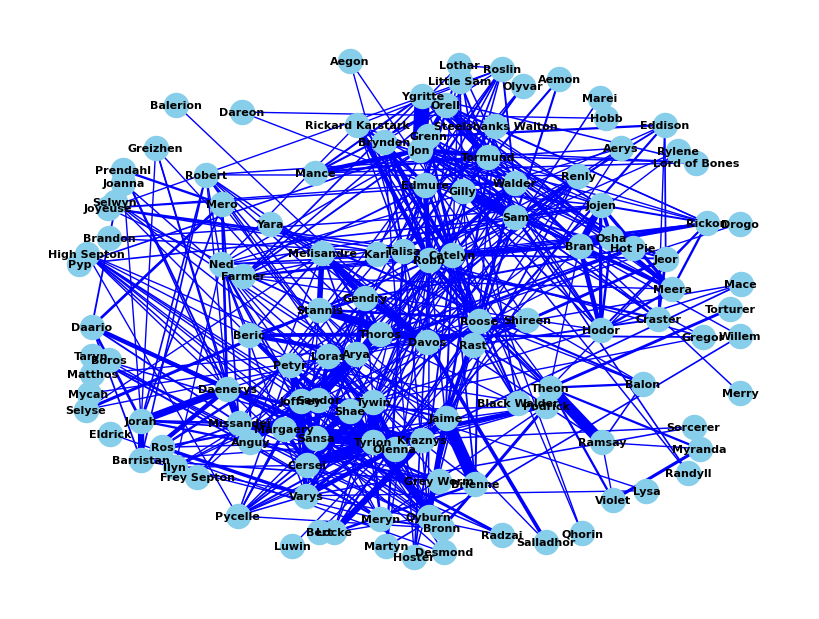

In [76]:
# plotting the graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, seed=42, k=2)

weights = np.array([data.get('weight', 1) for _, _, data in G.edges(data=True)])

min_w, max_w = weights.min(), weights.max()
scaled_widths = 1 + 10 * (weights - min_w) / (max_w - min_w + 1e-9)

nx.draw(
    G, pos,
    with_labels=True,
    labels={n: G.nodes[n]['label'] for n in G.nodes},
    node_color="skyblue",
    node_size=300,
    edge_color="blue",
    width=scaled_widths,
    font_size=8,
    font_weight="bold",
)

plt.show()

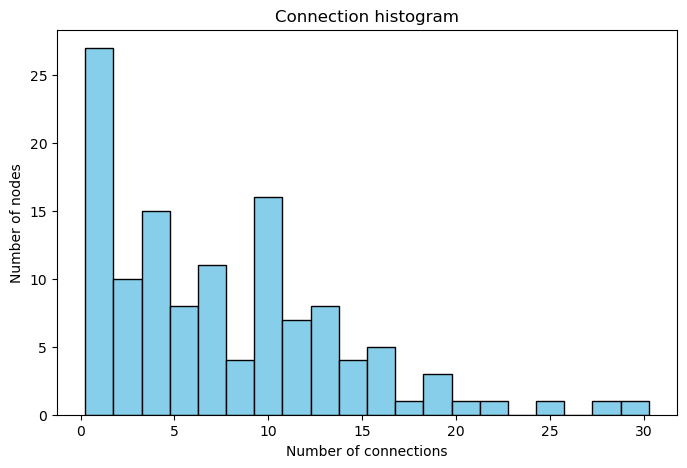

In [77]:
# drawing histogram
degrees = [val for (node, val) in G.degree()]

plt.figure(figsize=(8, 5))
plt.hist(degrees, bins=20, color="skyblue", edgecolor="black", align="left")
plt.xlabel("Number of connections")
plt.ylabel("Number of nodes")
plt.title("Connection histogram")
plt.show()

# thin tail
# decreasing tendency

## Network repository - Bio

In [78]:
# https://networkrepository.com/bio-CE-GT.php

file_path = "data/bio-CE-GT.edges"

G = nx.Graph()

with open(file_path, "r") as f:
    for line in f:
        parts = line.strip().split()
        if len(parts) != 3:
            continue
        u, v, w = parts
        u, v, w = int(u), int(v), float(w)
        G.add_edge(u, v, weight=w)

print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
print("First 5 edges with weights:")
for u, v, data in list(G.edges(data=True))[:5]:
    print(u, v, data['weight'])

Number of nodes: 924
Number of edges: 3239
First 5 edges with weights:
0 1 1.95891589829095
0 2 2.45025600547605
0 3 2.11055585107585
0 4 1.97584175101814
1 652 2.10011103124362


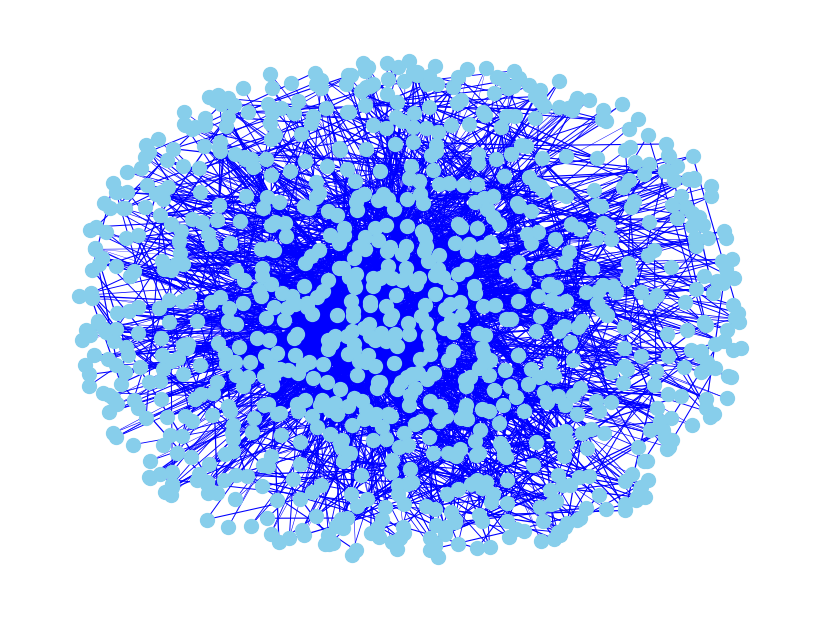

In [92]:
# plotting the graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, seed=42, k=0.5)

weights = np.array([data.get('weight', 1) for _, _, data in G.edges(data=True)])

min_w, max_w = weights.min(), weights.max()
scaled_widths = (weights - min_w) / (max_w - min_w + 1e-9)

nx.draw(
    G, pos,
    with_labels=False,
    node_color="skyblue",
    node_size=100,
    edge_color="blue",
    width=scaled_widths,
    font_weight="bold",
)

plt.show()

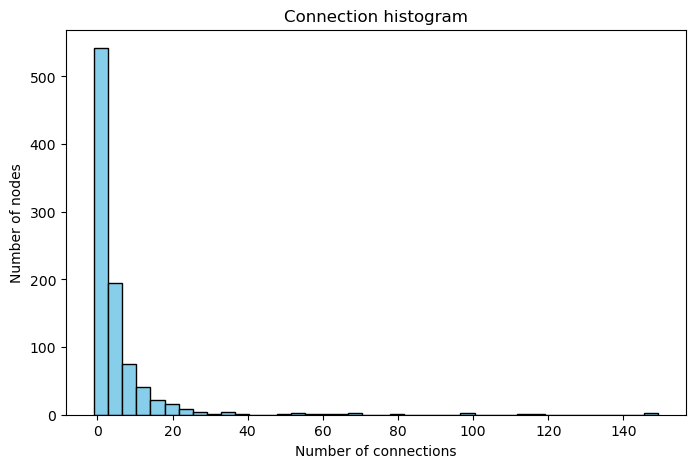

In [99]:
# drawing histogram
degrees = [val for (node, val) in G.degree()]

plt.figure(figsize=(8, 5))
plt.hist(degrees, bins=40, color="skyblue", edgecolor="black", align="left")
plt.xlabel("Number of connections")
plt.ylabel("Number of nodes")
plt.title("Connection histogram")
plt.show()

# very thin tail
# decreasing tendency
# very little nodes have a lot of connections
# the vast majority have only several connections

## Network data - 

In [100]:
# https://networkdata.ics.uci.edu/netdata/html/cities.html

## kateto - 